# Using Keras for handwriting recognition



Keras is a higher-level API within TensorFlow that makes things a lot easier. Not only is it easier to use, it's easier to tune.

We will set up a deep neural network with TensorFlow to learn from the MNIST data set.



## Importing libraries

In [57]:
import pandas as pd
import keras
import numpy as np

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

**loading up the MNIST data set. In Keras, it's a little bit different - there are 60K training samples and 10K test samples. No "validation" samples.**

In [19]:
mnist

<module 'tensorflow._api.v1.keras.datasets.mnist' from 'C:\\Users\\Beast\\Anacondanew\\envs\\tensorflow_env\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\mnist\\__init__.py'>

In [20]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [40]:
mnist_train_images.max()

255

**We need to explicitly convert the data into the format Keras / TensorFlow expects. We divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.**

In [41]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [43]:
mnist_train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Now we'll convert the 0-9 labels into "one-hot" format, as we did for TensorFlow.**

In [44]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

**Let's take a peek at one of the training images just to make sure it looks OK:**

In [45]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


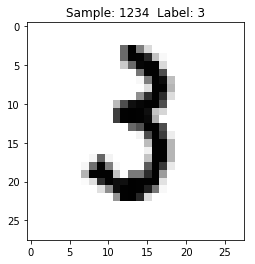

In [46]:
display_sample(1234)

**All that code we wrote in Tensorflow creating placeholders, variables, and defining a bunch of linear algebra for each layer in our neural network, None of that is necessary with Keras!**

**We will set up the same layers like this. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied.**

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

## Viewing the Graph

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Now we will set up optimizer and loss function. We will use the RMSProp optimizer here.** 

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Training our Model

**Here we'll do 10 epochs with a batch size of 100. Keras is slower, and if we're not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time (that's why I've limited it to just 10 epochs.)**

In [53]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2449 - acc: 0.9288 - val_loss: 0.1233 - val_acc: 0.9638
Epoch 2/10
 - 10s - loss: 0.0976 - acc: 0.9707 - val_loss: 0.0920 - val_acc: 0.9720
Epoch 3/10
 - 9s - loss: 0.0650 - acc: 0.9803 - val_loss: 0.0744 - val_acc: 0.9773
Epoch 4/10
 - 8s - loss: 0.0470 - acc: 0.9862 - val_loss: 0.0689 - val_acc: 0.9798
Epoch 5/10
 - 9s - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0749 - val_acc: 0.9779
Epoch 6/10
 - 10s - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0630 - val_acc: 0.9814
Epoch 7/10
 - 10s - loss: 0.0208 - acc: 0.9939 - val_loss: 0.0703 - val_acc: 0.9808
Epoch 8/10
 - 8s - loss: 0.0166 - acc: 0.9950 - val_loss: 0.0735 - val_acc: 0.9816
Epoch 9/10
 - 8s - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0693 - val_acc: 0.9819
Epoch 10/10
 - 8s - loss: 0.0097 - acc: 0.9974 - val_loss: 0.0722 - val_acc: 0.9825


But, even with just 10 epochs, we've outperformed our Tensorflow version considerably!

In [55]:
score = model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 80us/step
Test loss: 0.07216893939514649
Test accuracy: 0.9825


**As before let's visualize the ones it got wrong. As this model is much better, we'll have to search deeper to find mistakes to look at.**

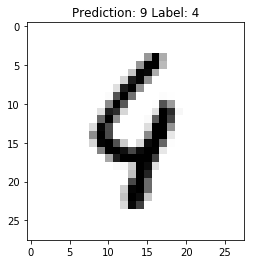

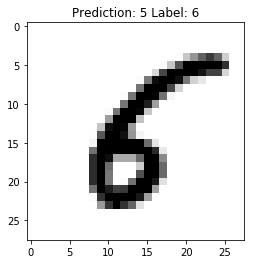

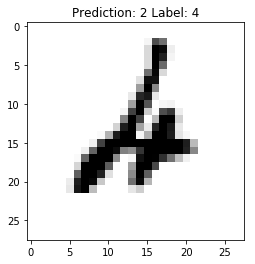

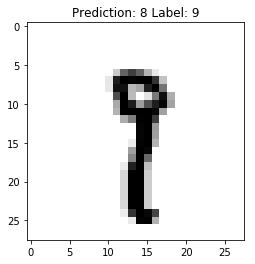

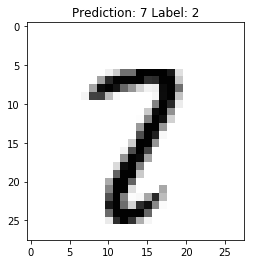

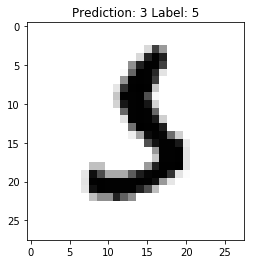

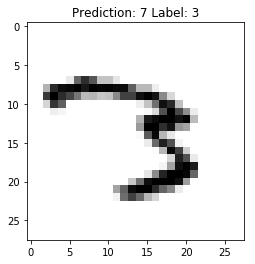

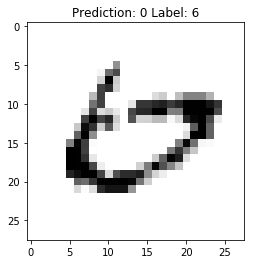

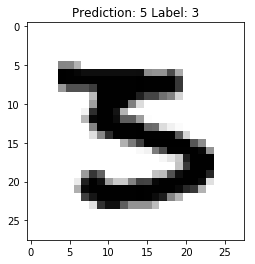

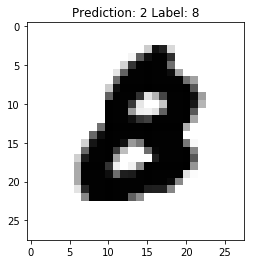

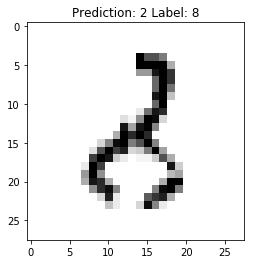

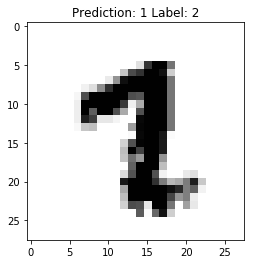

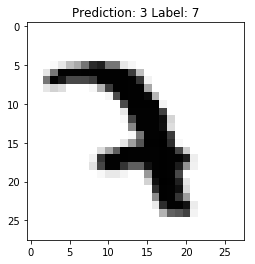

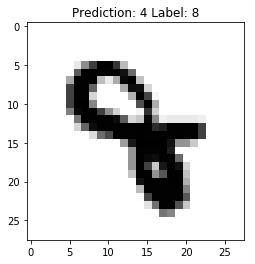

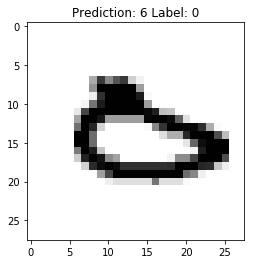

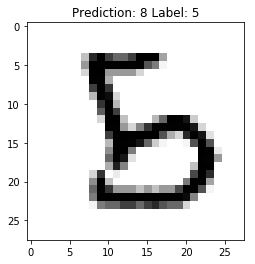

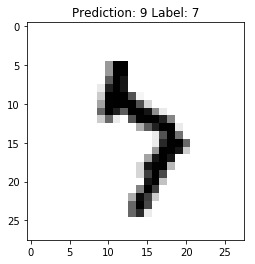

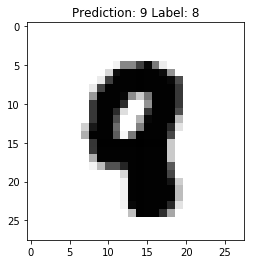

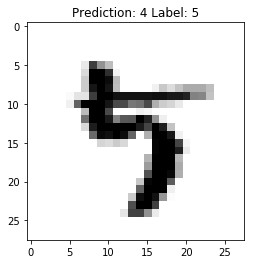

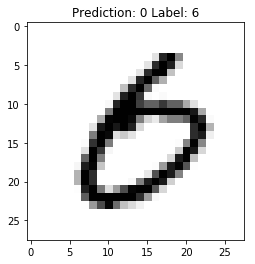

In [56]:
for x in range(1000):
    test_image = test_images[x].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

You can see most of the ones it's having trouble with, are images a human would have trouble with as well!

## Thanks!